In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('sentimentdataset.csv')
print(df.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')


In [4]:
df=df[['Text','Sentiment','Platform','Retweets','Likes','Country',]]
df.dropna(subset=['Text','Sentiment'],inplace=True)
df['Sentiment']=df['Sentiment'].str.lower()

df.head()

,Text,Sentiment,Platform,Retweets,Likes,Country
0,Enjoying a beautiful day at the park! ...,positive,Twitter,15.0,30.0,USA
1,Traffic was terrible this morning. ...,negative,Twitter,5.0,10.0,Canada
2,Just finished an amazing workout! 💪 ...,positive,Instagram,20.0,40.0,USA
3,Excited about the upcoming weekend getaway! ...,positive,Facebook,8.0,15.0,UK
4,Trying out a new recipe for dinner tonight. ...,neutral,Instagram,12.0,25.0,Australia


In [5]:
#mapping the values 
def map_sentiment(s):
    s = str(s).strip().lower()
    if s in ['positive', 'negative', 'neutral', 'other']:
        return s
    elif s in ['happy', 'joy', 'excitement', 'admiration', 'thrill', 'contentment', 'love']:
        return 'positive'
    elif s in ['anger', 'sadness', 'fear', 'disgust', 'hate']:
        return 'negative'
    else:
        return 'neutral'


df['sentiment_label'] = df['Sentiment'].apply(map_sentiment)
df = df[['Text', 'sentiment_label', 'Platform', 'Likes', 'Retweets', 'Country']]
df.head()

,Text,sentiment_label,Platform,Likes,Retweets,Country
0,Enjoying a beautiful day at the park! ...,positive,Twitter,30.0,15.0,USA
1,Traffic was terrible this morning. ...,negative,Twitter,10.0,5.0,Canada
2,Just finished an amazing workout! 💪 ...,positive,Instagram,40.0,20.0,USA
3,Excited about the upcoming weekend getaway! ...,positive,Facebook,15.0,8.0,UK
4,Trying out a new recipe for dinner tonight. ...,neutral,Instagram,25.0,12.0,Australia


In [6]:
#Removing the emojies
import re

def remove_emojis(text):
    emoji_pattern = re.compile(
        "["                      
        "\U0001F600-\U0001F64F"   
        "\U0001F300-\U0001F5FF"   
        "\U0001F680-\U0001F6FF"   
        "\U0001F1E0-\U0001F1FF"  
        "\U00002700-\U000027BF"   
        "\U000024C2-\U0001F251"   
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', str(text))
  
df['Text'] = df['Text'].apply(remove_emojis)
df.head()

,Text,sentiment_label,Platform,Likes,Retweets,Country
0,Enjoying a beautiful day at the park! ...,positive,Twitter,30.0,15.0,USA
1,Traffic was terrible this morning. ...,negative,Twitter,10.0,5.0,Canada
2,Just finished an amazing workout! ...,positive,Instagram,40.0,20.0,USA
3,Excited about the upcoming weekend getaway! ...,positive,Facebook,15.0,8.0,UK
4,Trying out a new recipe for dinner tonight. ...,neutral,Instagram,25.0,12.0,Australia


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:

X=df['Text']
y=df['sentiment_label']

print(X)

0       Enjoying a beautiful day at the park!        ...
1       Traffic was terrible this morning.           ...
2       Just finished an amazing workout!            ...
3       Excited about the upcoming weekend getaway!  ...
4       Trying out a new recipe for dinner tonight.  ...
                             ...                        
727    Collaborating on a science project that receiv...
728    Attending a surprise birthday party organized ...
729    Successfully fundraising for a school charity ...
730    Participating in a multicultural festival, cel...
731    Organizing a virtual talent show during challe...
Name: Text, Length: 732, dtype: object


In [9]:
#train test split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [10]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [11]:
model=MultinomialNB()
model.fit(X_train_tfidf, Y_train)


MultinomialNB()

In [12]:
#predicting the model and accuracy score

y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))

Accuracy: 0.7142857142857143

Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00         9
     neutral       0.70      1.00      0.83       100
    positive       1.00      0.13      0.23        38

    accuracy                           0.71       147
   macro avg       0.57      0.38      0.35       147
weighted avg       0.74      0.71      0.62       147



c:\Users\Veer Jain\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Veer Jain\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Veer Jain\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


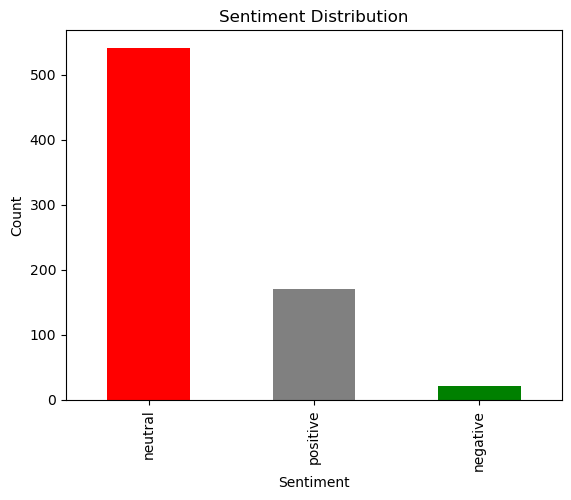

In [13]:
plt.figure()
df['sentiment_label'].value_counts().plot(kind='bar', color=['red','gray','green'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [14]:
import joblib
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']